Capstone II
1. Go out and find a dataset of interest.
2. Explore the data. Get to know the data.
3. Model your outcome of interest. You should try several different approaches and really work to tune a variety of models before using the model evaluation techniques to choose what you consider to be the best performer. Make sure to think about explanatory versus predictive power, and experiment with both.


    

I selected the Heart Failure dataset. The goal of this Capstone project is to predict if the patient has heart disease given the features.
This dataset includes patient data from Cleveland, Hungary, Switzerland, Long Beach VA, and Stalog.

Citation: fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved June 14th, 2024 from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

Information from the dataset:


1.  Age: age of the patient [years]
2.    Sex: sex of the patient [M: Male, F: Female]
3.    ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4.    RestingBP: resting blood pressure [mm Hg]
5.    Cholesterol: serum cholesterol [mm/dl]
6.    FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7.    RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8.    MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9.    ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10.    Oldpeak: oldpeak = ST [Numeric value measured in depression]
11.    ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12.    HeartDisease: output class [1: heart disease, 0: Normal]




In [1]:
import pandas as pd
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/python_for_data_scientists/example_data/heart.csv")
df2 = df.copy()
print(df.head(5))


Mounted at /content/drive
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


#**Data Cleaning**

In [2]:
#Start Data Cleaning
print('Shape: ', df.shape)
print('\nInfo:')
df.info()
#Check for missing data
print('\nMissing data:\n', df.isna().sum())

Shape:  (918, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

Missing data:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
E

There is no missing data.

In [3]:
#Check for duplicated entries
df.duplicated().sum()

0

In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


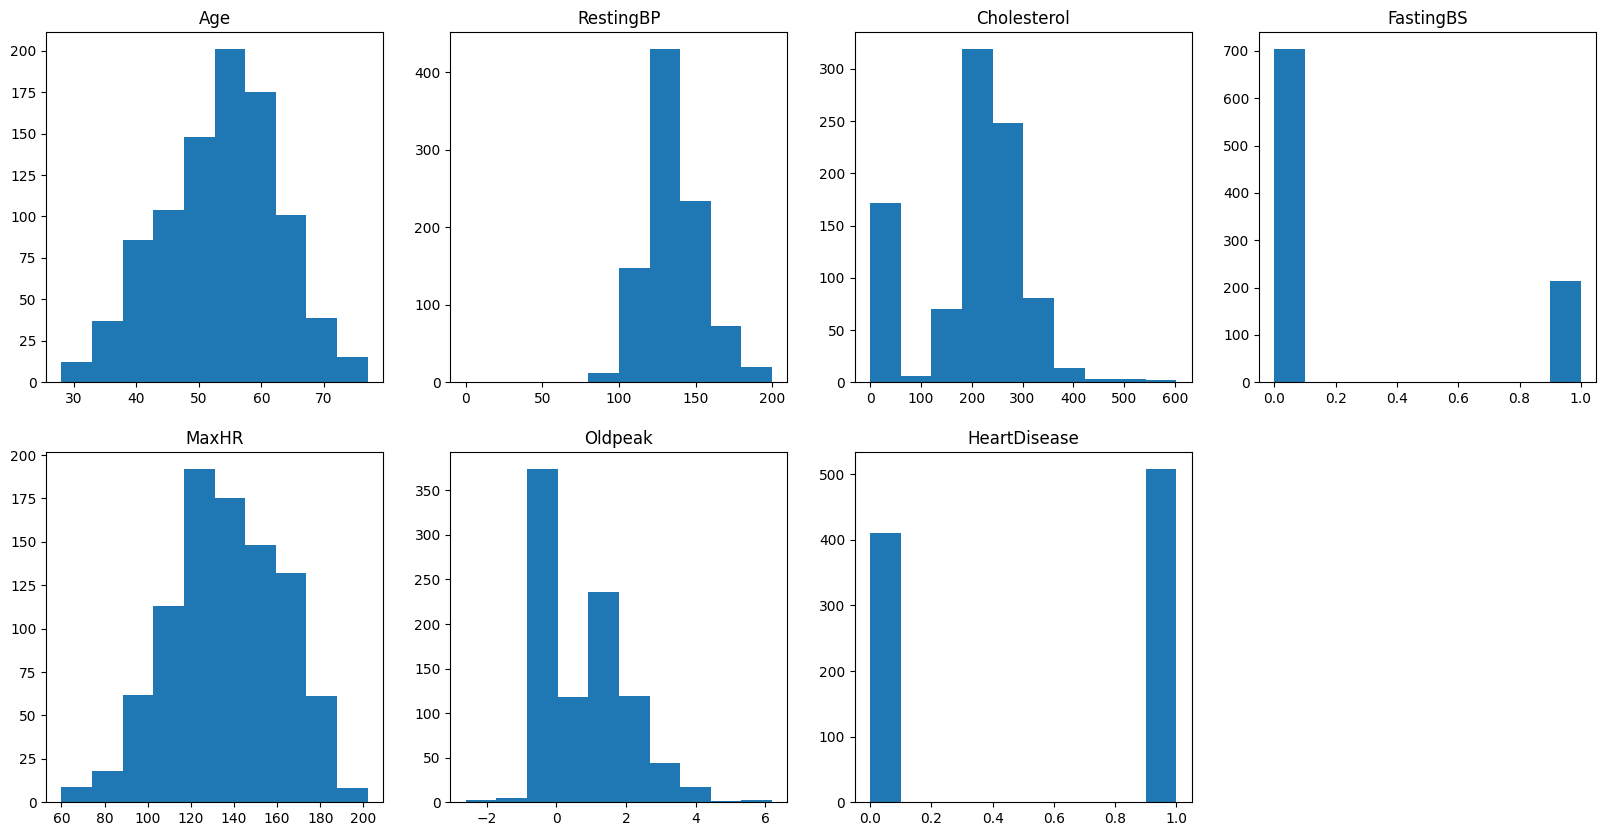

In [5]:
#Plot histograms to obtain distributions
plt.figure(figsize=(20,10))

lst=['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','HeartDisease']

for i in range(7):
  plt.subplot(2, 4, i+1)
  plt.hist(df[lst[i]])
  plt.title(lst[i])

plt.show()

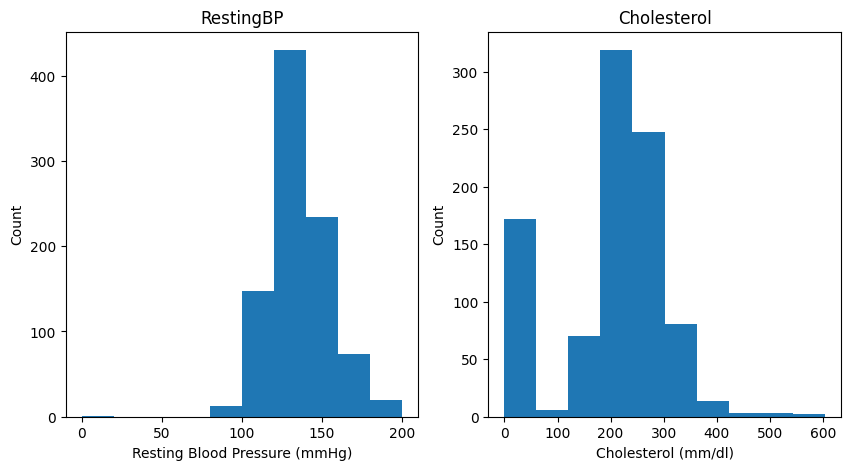

In [6]:
#Plot histograms to obtain distributions
plt.figure(figsize=(10,5))

lst=['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','HeartDisease']

plt.subplot(1, 2, 1)
plt.hist(df['RestingBP'])
plt.ylabel('Count')
plt.xlabel('Resting Blood Pressure (mmHg)')
plt.title('RestingBP')

plt.subplot(1, 2, 2)
plt.hist(df['Cholesterol'])
plt.ylabel('Count')
plt.xlabel('Cholesterol (mm/dl)')
plt.title('Cholesterol')

plt.show()

Resting BP and Cholesterol have "0" values, which is not possible. Replace these with average.

In [7]:
print("# of zeros in RestingBP: ", df.RestingBP[df.RestingBP == 0].count())
print("# of zeros in Cholesterol: ", df.Cholesterol[df.Cholesterol == 0].count())

# of zeros in RestingBP:  1
# of zeros in Cholesterol:  172


In [8]:
df.RestingBP.replace(0, df.RestingBP.mean(axis=0), inplace=True)
print("# of zeros in RestingBP: ", df.RestingBP[df.RestingBP == 0].count())

df.Cholesterol.replace(0, df.Cholesterol.mean(axis=0), inplace=True)
print("# of zeros in Cholesterol: ", df.Cholesterol[df.Cholesterol == 0].count())

# of zeros in RestingBP:  0
# of zeros in Cholesterol:  0


#**Data Exploration**

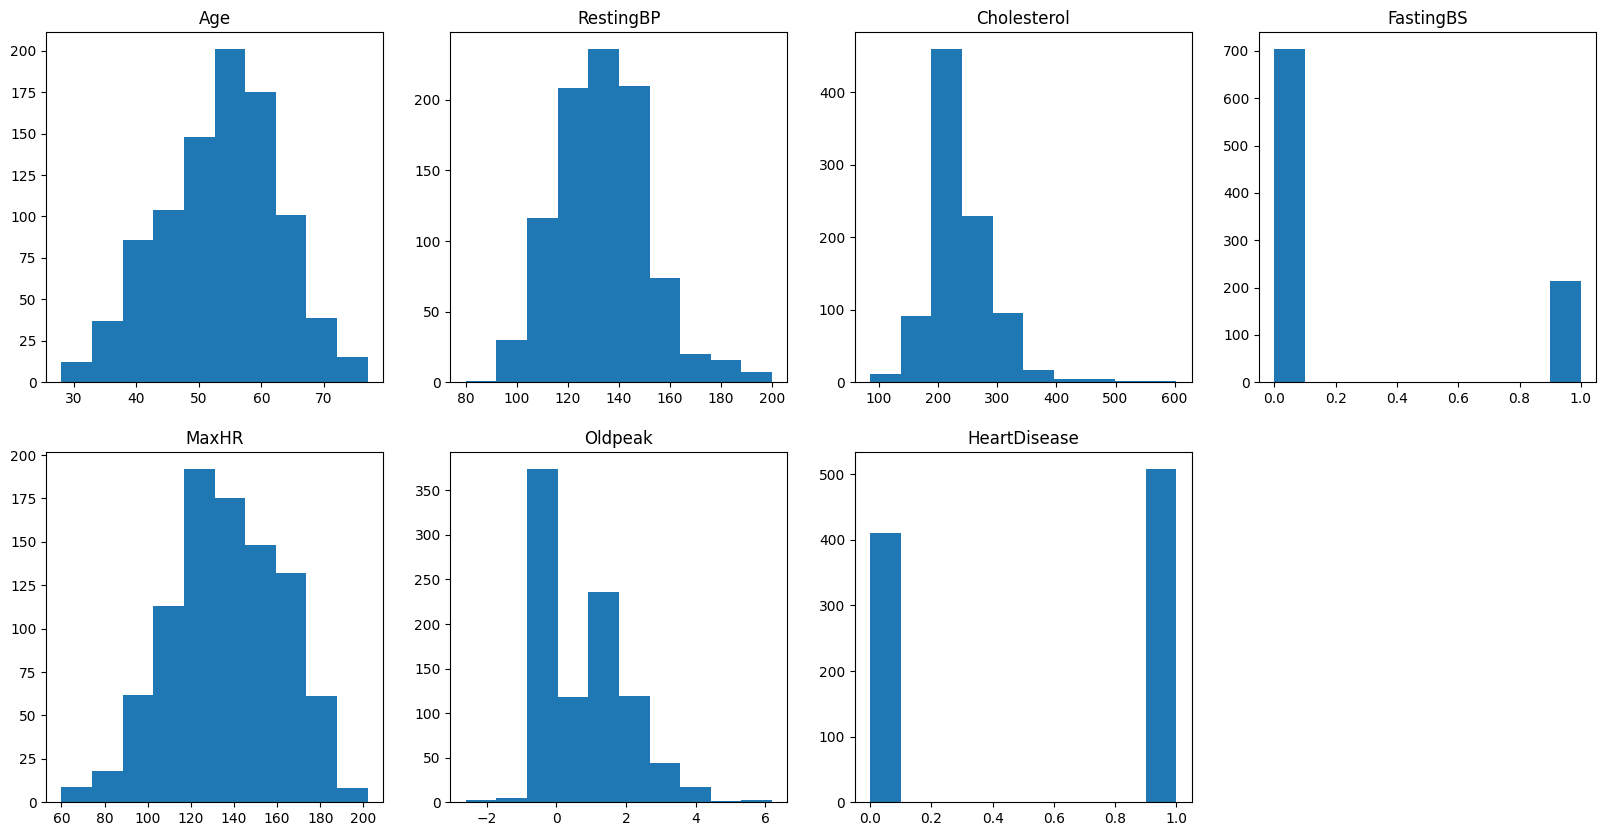

In [9]:
#Plot histograms to obtain distributions
plt.figure(figsize=(20,10))

lst=['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','HeartDisease']

for i in range(7):
  plt.subplot(2, 4, i+1)
  plt.hist(df[lst[i]])
  plt.title(lst[i])

plt.show()

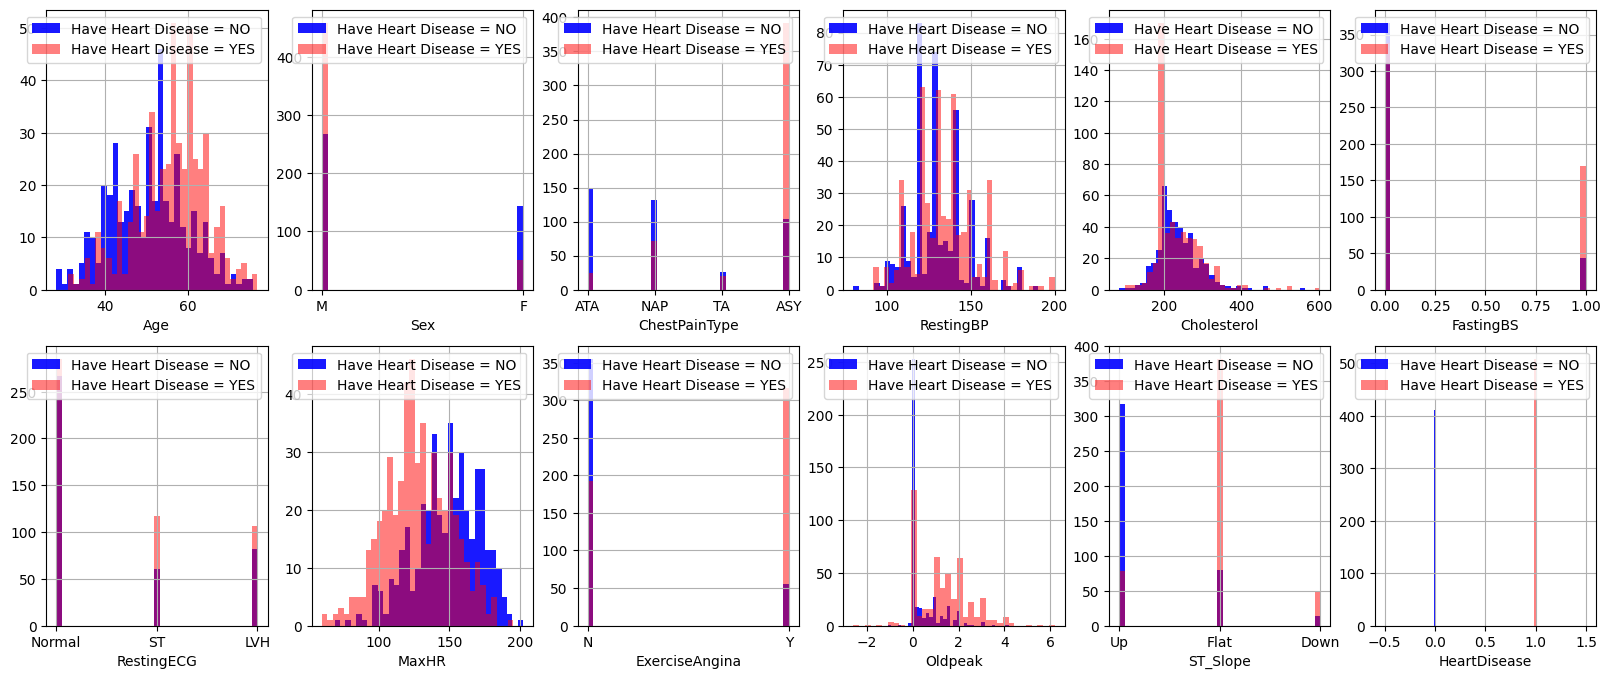

In [10]:
#Check correlations of quantitative data to heart disease
plt.figure(figsize=(20, 8))

for i, column in enumerate(df.columns, 1):
    plt.subplot(2, 6, i)
    df[df["HeartDisease"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.9)
    df[df["HeartDisease"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.5)
    plt.legend()
    plt.xlabel(column)

In [11]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.540737,236.047413,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.989932,56.240952,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,198.799564,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Observations:

*   Age: Heart disease patients are generally older
*   Sex: More men have heart disease
* Chest pain type: ASY has higher heart disease rate
* RestingBP: Difficult to tell from histogram
* Cholesterol: There is a large peak at the average for patients with heart disease. The data processes by replacing "0" with average may affect the results. Conclusion here is many of the patients with heart disease did not have their cholesterol reading taken.
* FastingBS: More patients with heart disease are 1 (> 120 mg/dL)
* RestingECG: Patients with heart disease have ST or LVH, but the difference is small.
* MaxHR: Patients with heart disease tend to have lower Max HR. However, Max HR is also related to age.
* ExerciseAngina: Heart disease patients tend to have angina while exercising.
* Oldpeak: Heart disease patients tend to have old ST peaks > 0.
* ST_Slope: Heart disease patients tend to have ST_Slope of flat or down.
* People with heart disease are generally older and have a lower heart rate.

Data health:
* n = 918
* Cholestrol and Oldpeak have positive skew.




In [12]:
#Get dummy variables for categorical features
#Change Sex and ExerciseAngina to 1 and 0
df['Sex'] = df['Sex'].apply(lambda x:1 if x =='M' else 0)
df["ExerciseAngina"] = df["ExerciseAngina"].apply(lambda x: 1 if x =='Y' else 0)
#Get dummies for ChestPainType, RestingECG, and ST_slope
df=df.join(pd.get_dummies(df['ChestPainType']))
df=df.join(pd.get_dummies(df['RestingECG']))
df=df.join(pd.get_dummies(df['ST_Slope']))
df=df.drop('ChestPainType', axis=1)
df=df.drop('RestingECG', axis=1)
df=df.drop('ST_Slope', axis=1)

In [13]:
#Check correlation
df.corr()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
Age,1.000000,0.055750,0.263079,0.006397,0.198039,-0.382045,0.215793,0.258612,0.282039,0.166607,-0.218165,-0.011335,0.032042,0.145727,-0.230566,0.136798,0.138397,0.185568,-0.258067
Sex,0.055750,1.000000,0.009421,-0.151270,0.120076,-0.189186,0.190664,0.105734,0.305445,0.183876,-0.161522,-0.066486,-0.004031,-0.049518,-0.010634,0.063715,0.066036,0.116077,-0.150942
RestingBP,0.263079,0.009421,1.000000,0.096524,0.067816,-0.109669,0.153015,0.174215,0.117930,0.041550,-0.051363,-0.027500,0.049465,0.050645,-0.113725,0.089149,-0.010320,0.110102,-0.105918
Cholesterol,0.006397,-0.151270,0.096524,1.000000,-0.061967,0.072644,0.047294,0.059128,-0.012340,0.021201,0.043231,-0.050359,-0.030129,0.122682,-0.046689,-0.067403,-0.037253,0.053563,-0.035069
FastingBS,0.198039,0.120076,0.067816,-0.061967,1.000000,-0.131438,0.060451,0.052698,0.267291,0.131176,-0.140514,-0.039249,0.026885,-0.011656,-0.093028,0.127110,0.105102,0.107006,-0.161730
MaxHR,-0.382045,-0.189186,-0.109669,0.072644,-0.131438,1.000000,-0.370425,-0.160691,-0.400421,-0.354963,0.253735,0.134580,0.100025,0.125793,0.023801,-0.157879,-0.073316,-0.342581,0.383397
ExerciseAngina,0.215793,0.190664,0.153015,0.047294,0.060451,-0.370425,1.000000,0.408752,0.494282,0.430034,-0.300365,-0.166030,-0.128105,-0.016382,-0.072924,0.107036,0.136439,0.382237,-0.455676
Oldpeak,0.258612,0.105734,0.174215,0.059128,0.052698,-0.160691,0.408752,1.000000,0.403951,0.280026,-0.262124,-0.106212,0.032231,0.086794,-0.116719,0.055958,0.322130,0.283295,-0.450577
HeartDisease,0.282039,0.305445,0.117930,-0.012340,0.267291,-0.400421,0.494282,0.403951,1.000000,0.516716,-0.401924,-0.212964,-0.054790,0.010670,-0.091580,0.102527,0.122527,0.554134,-0.622164
ASY,0.166607,0.183876,0.041550,0.021201,0.131176,-0.354963,0.430034,0.280026,0.516716,1.000000,-0.522432,-0.577670,-0.249003,0.002289,-0.063606,0.076438,0.103407,0.303645,-0.359443


<Axes: >

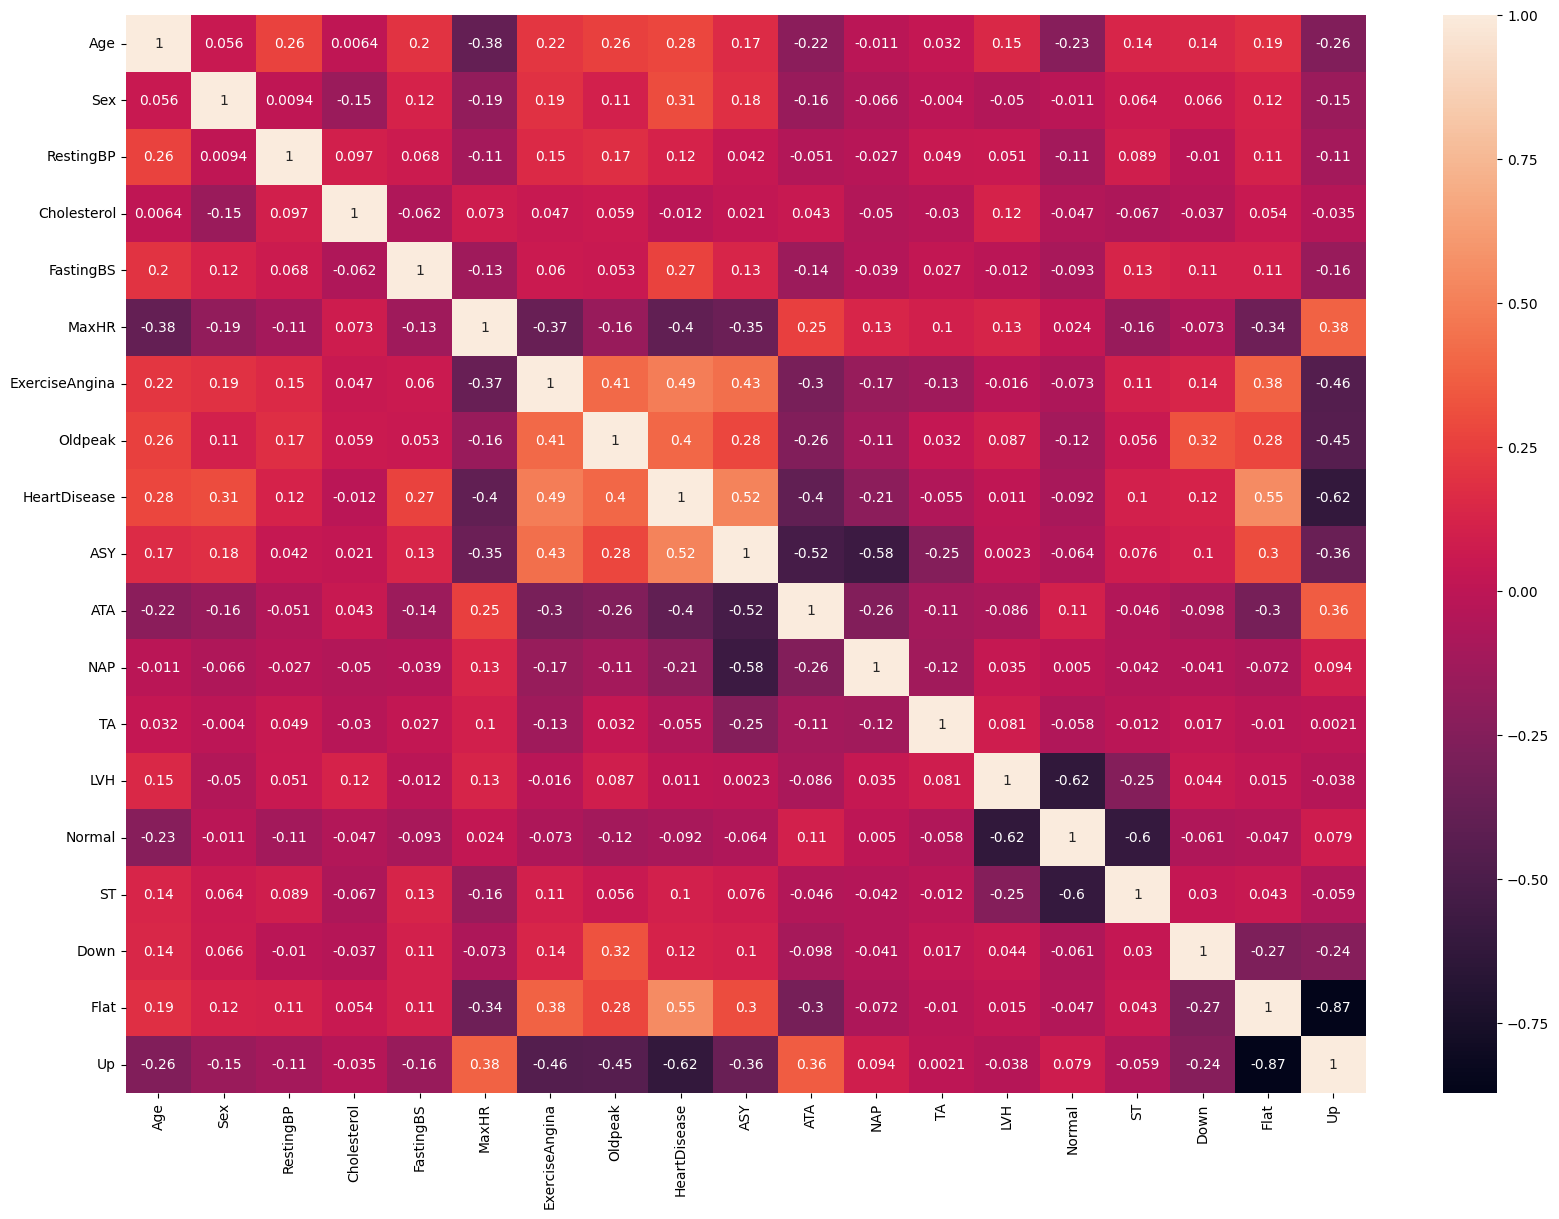

In [14]:
#Create a heat map of the correlation.
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(), annot=True)

Many of the variables do not have a high correlation with heart disease. Highest correlation values:


*   ST_Slope UP has -0.62
*   ST_Slope flat has 0.55
* ATA has -0.5
* ASY has 0.52
* Oldpeak has 0.4
* ExerciseAngina has 0.49
* MaxHR has -0.4



# **Modeling**

In [15]:
#Split 20% data into test
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=40)

In [27]:
#Base models
pd.set_option('display.float_format', lambda x: '%.3f' % x)

classifiers = [('LogisticRegression', LogisticRegression()),
               ('KNN', KNeighborsClassifier()),
               ('DecisionTree', DecisionTreeClassifier()),
               ('RandomForest', RandomForestClassifier()),
               ('SVC', SVC()),
               ('GradientBoost', GradientBoostingClassifier())
               ]
score = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'roc_auc'])
for name, classifier in classifiers:
    cv_results = cross_validate(classifier, X, y, cv=5, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])
    f1 = cv_results['test_f1'].mean()
    precision = cv_results['test_precision'].mean()
    recall = cv_results['test_recall'].mean()
    auc = cv_results['test_roc_auc'].mean()
    accuracy = cv_results['test_accuracy'].mean()
    score[name] = [accuracy, precision, recall, f1, auc]
    print(f'{name} calculating')
print(score.T)

LogisticRegression calculating
KNN calculating
DecisionTree calculating
RandomForest calculating
SVC calculating
GradientBoost calculating
                    Accuracy  Precision  Recall  F1 Score  roc_auc
LogisticRegression     0.835      0.851   0.860     0.852    0.910
KNN                    0.643      0.687   0.671     0.670    0.682
DecisionTree           0.753      0.799   0.752     0.770    0.753
RandomForest           0.829      0.846   0.854     0.846    0.909
SVC                    0.668      0.700   0.734     0.705    0.727
GradientBoost          0.829      0.857   0.840     0.843    0.903


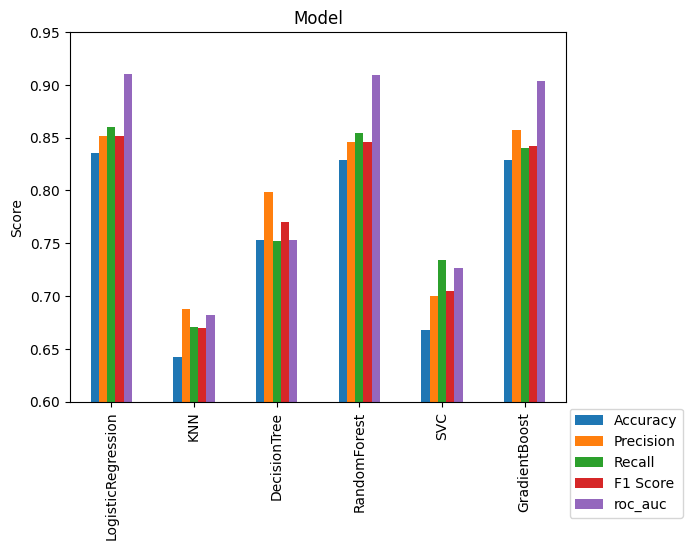

In [42]:
score.T.plot.bar()
plt.ylabel('Score')
plt.title('Model')
plt.legend(bbox_to_anchor = (1.25, 0))
plt.ylim(0.6,0.95)
plt.show()

In [17]:
#Tune GradientBoost

params = {'n_estimators': 100,
          'max_depth': 2,
          'loss': 'deviance'}

classifiers = [('GradientBoost', GradientBoostingClassifier(**params))
               ]
score = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'roc_auc'])
for name, classifier in classifiers:
    cv_results = cross_validate(classifier, X, y, cv=5, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])
    f1 = cv_results['test_f1'].mean()
    precision = cv_results['test_precision'].mean()
    recall = cv_results['test_recall'].mean()
    auc = cv_results['test_roc_auc'].mean()
    accuracy = cv_results['test_accuracy'].mean()
    score[name] = [accuracy, precision, recall, f1, auc]
    print(f'{name} calculating')
print(score.T)

GradientBoost calculating
               Accuracy  Precision  Recall  F1 Score  roc_auc
GradientBoost     0.830      0.856   0.842     0.844    0.907


In [18]:
#Tune GradientBoost continued

params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

classifiers = [('GradientBoost', GradientBoostingClassifier(**params))
               ]
score = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'roc_auc'])
for name, classifier in classifiers:
    cv_results = cross_validate(classifier, X, y, cv=5, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])
    f1 = cv_results['test_f1'].mean()
    precision = cv_results['test_precision'].mean()
    recall = cv_results['test_recall'].mean()
    auc = cv_results['test_roc_auc'].mean()
    accuracy = cv_results['test_accuracy'].mean()
    score[name] = [accuracy, precision, recall, f1, auc]
    print(f'{name} calculating')
print(score.T)

GradientBoost calculating
               Accuracy  Precision  Recall  F1 Score  roc_auc
GradientBoost     0.817      0.850   0.823     0.830    0.880


In [19]:
#Tune GradientBoost continued

params = {'n_estimators': 100,
          'max_depth': 4,
          'loss': 'deviance'}

classifiers = [('GradientBoost', GradientBoostingClassifier(**params))
               ]
score = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'roc_auc'])
for name, classifier in classifiers:
    cv_results = cross_validate(classifier, X, y, cv=5, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])
    f1 = cv_results['test_f1'].mean()
    precision = cv_results['test_precision'].mean()
    recall = cv_results['test_recall'].mean()
    auc = cv_results['test_roc_auc'].mean()
    accuracy = cv_results['test_accuracy'].mean()
    score[name] = [accuracy, precision, recall, f1, auc]
    print(f'{name} calculating')
print(score.T)

GradientBoost calculating
               Accuracy  Precision  Recall  F1 Score  roc_auc
GradientBoost     0.828      0.863   0.832     0.840    0.899


In [20]:
#Tune GradientBoost continued

params = {'n_estimators': 100,
          'max_depth': 2,
          'loss': 'log_loss'}

classifiers = [('GradientBoost', GradientBoostingClassifier(**params))
               ]
score = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'roc_auc'])
for name, classifier in classifiers:
    cv_results = cross_validate(classifier, X, y, cv=5, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])
    f1 = cv_results['test_f1'].mean()
    precision = cv_results['test_precision'].mean()
    recall = cv_results['test_recall'].mean()
    auc = cv_results['test_roc_auc'].mean()
    accuracy = cv_results['test_accuracy'].mean()
    score[name] = [accuracy, precision, recall, f1, auc]
    print(f'{name} calculating')
print(score.T)

GradientBoost calculating
               Accuracy  Precision  Recall  F1 Score  roc_auc
GradientBoost     0.829      0.856   0.840     0.843    0.907


In [21]:
#Tune GradientBoost continued

params = {'n_estimators': 100,
          'max_depth': 2,
          'loss': 'exponential'}

classifiers = [('GradientBoost', GradientBoostingClassifier(**params))
               ]
score = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'roc_auc', 'n_estimators', 'max_depth', 'loss'])
for name, classifier in classifiers:
    cv_results = cross_validate(classifier, X, y, cv=5, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])
    f1 = cv_results['test_f1'].mean()
    precision = cv_results['test_precision'].mean()
    recall = cv_results['test_recall'].mean()
    auc = cv_results['test_roc_auc'].mean()
    accuracy = cv_results['test_accuracy'].mean()
    score[name] = [accuracy, precision, recall, f1, auc, params['n_estimators'], params['max_depth'], params['loss']]
    print(f'{name} calculating')
print(score.T)

GradientBoost calculating
              Accuracy Precision Recall F1 Score roc_auc n_estimators  \
GradientBoost    0.827     0.854  0.840    0.842   0.907          100   

              max_depth         loss  
GradientBoost         2  exponential  


In [22]:
#Tune LogisticRegression


classifiers = [('LogisticRegression', LogisticRegression(solver='liblinear', penalty='l2', C=1, max_iter=500))
               ]
score = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'roc_auc'])
for name, classifier in classifiers:
    cv_results = cross_validate(classifier, X, y, cv=5, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])
    f1 = cv_results['test_f1'].mean()
    precision = cv_results['test_precision'].mean()
    recall = cv_results['test_recall'].mean()
    auc = cv_results['test_roc_auc'].mean()
    accuracy = cv_results['test_accuracy'].mean()
    score[name] = [accuracy, precision, recall, f1, auc]
    print(f'{name} calculating')
print(score.T)

LogisticRegression calculating
                    Accuracy  Precision  Recall  F1 Score  roc_auc
LogisticRegression     0.833      0.850   0.858     0.850    0.911


In [23]:
#Tune LogisticRegression

classifiers = [('LogisticRegression', LogisticRegression(penalty=None, C=1, max_iter=500))
               ]
score = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'roc_auc'])
for name, classifier in classifiers:
    cv_results = cross_validate(classifier, X, y, cv=5, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])
    f1 = cv_results['test_f1'].mean()
    precision = cv_results['test_precision'].mean()
    recall = cv_results['test_recall'].mean()
    auc = cv_results['test_roc_auc'].mean()
    accuracy = cv_results['test_accuracy'].mean()
    score[name] = [accuracy, precision, recall, f1, auc]
    print(f'{name} calculating')
print(score.T)

LogisticRegression calculating
                    Accuracy  Precision  Recall  F1 Score  roc_auc
LogisticRegression     0.832      0.852   0.854     0.848    0.910


## **Conclusion**:

Overall, Logistic Regression with the default parameters scored the best in accuracy, recall, F1 score, and area under ROC curve.

The default parameters are L2 penalty, C=1.0, lbfgs solver, and 100 max iterations.

The precision was higher in Gradient Boost, but the other metrics were a little lower.

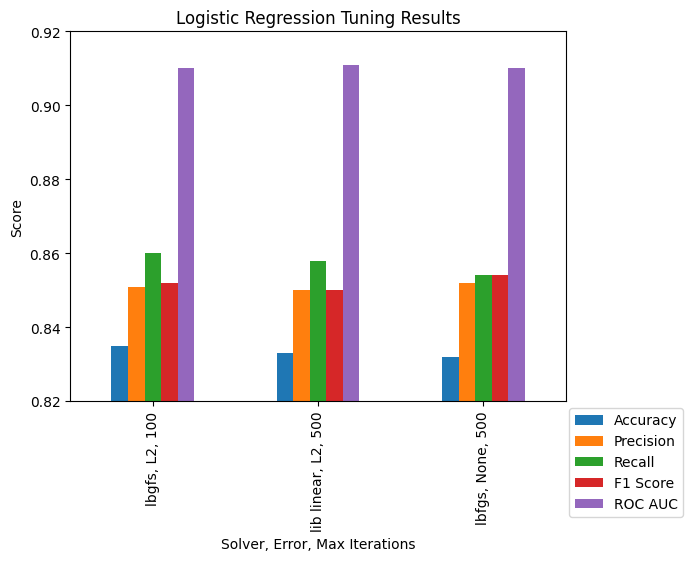

In [53]:
#Graphs for presentation
data = {'Accuracy': [0.835, 0.833, 0.832],
        'Precision': [0.851, 0.85, 0.852],
        'Recall': [0.860, 0.858, 0.854],
        'F1 Score': [0.852, 0.85, 0.854],
        'ROC AUC': [0.910, 0.911, 0.910]}

logreg_df = pd.DataFrame(data, index=['lbgfs, L2, 100', 'lib linear, L2, 500', 'lbfgs, None, 500'])

logreg_df.plot.bar()
plt.title('Logistic Regression Tuning Results')
plt.ylabel('Score')
plt.xlabel('Solver, Error, Max Iterations')
plt.legend(bbox_to_anchor = (1.25, 0))
plt.ylim(0.82,0.92)
plt.show()

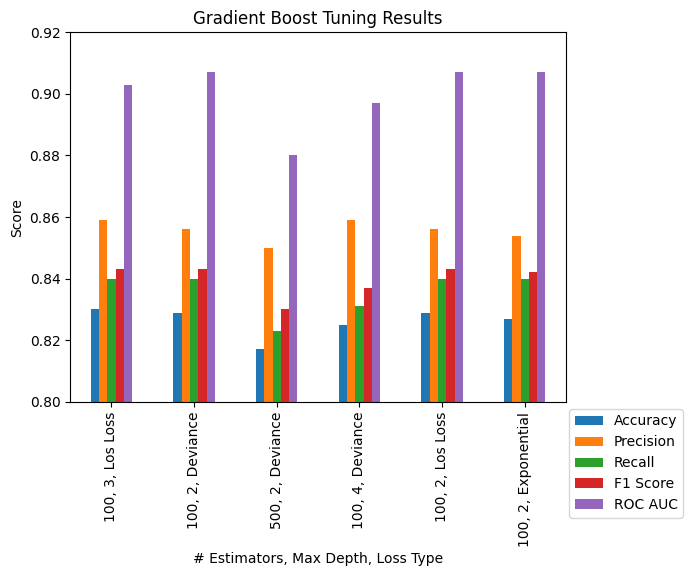

In [55]:
#Graphs for presentation
data = {'Accuracy': [0.83, 0.829, 0.817, 0.825, 0.829, 0.827],
        'Precision': [0.859, 0.856, 0.85, 0.859, 0.856, 0.854],
        'Recall': [0.84, 0.84, 0.823, 0.831, 0.84, 0.84],
        'F1 Score': [0.843, 0.843, 0.83, 0.837, 0.843, 0.842],
        'ROC AUC': [0.903, 0.907, 0.88, 0.897, 0.907, 0.907]}

logreg_df = pd.DataFrame(data, index=['100, 3, Los Loss', '100, 2, Deviance', '500, 2, Deviance', '100, 4, Deviance', '100, 2, Los Loss', '100, 2, Exponential'])

logreg_df.plot.bar()
plt.title('Gradient Boost Tuning Results')
plt.ylabel('Score')
plt.xlabel('# Estimators, Max Depth, Loss Type')
plt.legend(bbox_to_anchor = (1.25, 0))
plt.ylim(0.80,0.92)
plt.show()